In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('raw_depression_dataset.csv')
data.head(10)

/tmp/ipykernel_355/2534145879.py:1: DtypeWarning: Columns (7,8,9,10,11,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('raw_depression_dataset.csv')


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,NaN,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.9,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170700 entries, 0 to 170699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     170700 non-null  int64  
 1   Name                                   170700 non-null  object 
 2   Gender                                 169976 non-null  object 
 3   Age                                    170700 non-null  float64
 4   City                                   169942 non-null  object 
 5   Working Professional or Student        170700 non-null  object 
 6   Profession                             125632 non-null  object 
 7   Academic Pressure                      34099 non-null   object 
 8   Work Pressure                          136207 non-null  object 
 9   CGPA                                   35308 non-null   object 
 10  Study Satisfaction                     34090 non-null   

In [4]:
missing_analysis = data[data['Academic Pressure'].isnull()]['Working Professional or Student'].value_counts()

print("Số lượng missing value của Academic Pressure phân theo nhóm đối tượng:")
print(missing_analysis)

Số lượng missing value của Academic Pressure phân theo nhóm đối tượng:
Working Professional or Student
Working Professional    136583
Student                     18
Name: count, dtype: int64


hầu hết missing của academic pressure đều  là working professinal -> ít ng đi làm vì kh còn đi họcc -> ít áp lực học 

In [5]:
#student thieu work?
print("--- Check Student vs Work Data ---")
check_student = data[data['Working Professional or Student'] == 'Student'][['Work Pressure', 'Job Satisfaction']].isnull().sum()
print(check_student)

--- Check Student vs Work Data ---
Work Pressure       33880
Job Satisfaction    33869
dtype: int64


Work Pressure và Job Satisfaction bị thiếu chủ yếu là do nhóm Student (chiếm ~98% số lượng missing của cột này).

In [6]:
data[data['Work Pressure'].isnull()]['Working Professional or Student'].value_counts()

Working Professional or Student
Student                 33880
Working Professional      613
Name: count, dtype: int64

In [7]:
# Ai thieuu Profession?
print("\n--- Check Missing Profession ---")
missing_profession = data[data['Profession'].isnull()]['Working Professional or Student'].value_counts()
print(missing_profession)


--- Check Missing Profession ---
Working Professional or Student
Student                 33884
Working Professional    11184
Name: count, dtype: int64


Cột Profession bị thiếu bao gồm cả Student (vì họ chưa có nghề) và Working Professional (nhóm người đi làm nhưng không khai báo nghề nghiệp cụ thể - khoảng 11k người).

## Process

Xử lý trên bản copy để tránh sai sót, sau khi chốt sẽ convert bản copy -> chính 

In [8]:
data_copy = data.copy()

In [9]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170700 entries, 0 to 170699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     170700 non-null  int64  
 1   Name                                   170700 non-null  object 
 2   Gender                                 169976 non-null  object 
 3   Age                                    170700 non-null  float64
 4   City                                   169942 non-null  object 
 5   Working Professional or Student        170700 non-null  object 
 6   Profession                             125632 non-null  object 
 7   Academic Pressure                      34099 non-null   object 
 8   Work Pressure                          136207 non-null  object 
 9   CGPA                                   35308 non-null   object 
 10  Study Satisfaction                     34090 non-null   

In [10]:
cols_to_drop = ['id', 'Name']
data_copy = data_copy.drop(columns=cols_to_drop, errors='ignore')
print("--- Đã xóa cột ID và Name ---")
print("Các cột còn lại:", data_copy.columns.tolist())

## Handle text

Academic Pressure', 'Study Satisfaction', 'Work Pressure', 'Job Satisfaction

In [11]:
data_copy.isnull().sum().sort_values(ascending = False)

Study Satisfaction                       136610
Academic Pressure                        136601
CGPA                                     135392
Profession                                45068
Work Pressure                             34493
Job Satisfaction                          33911
City                                        758
Dietary Habits                              757
Sleep Duration                              750
Gender                                      724
Degree                                      723
Financial Stress                            701
Age                                           0
Name                                          0
id                                            0
Working Professional or Student               0
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [12]:
data['Study Satisfaction'].unique()

array([nan, 2.0, 5.0, 3.0, 4.0, 1.0, '2.0', '3.0', '1.0', '5.0', '4.0',
       '??', '#VALUE!', 'Error', 'High', 'Low', 'Not Available', 'Twenty',
       'Null'], dtype=object)

### Bước 1: Làm sạch thô & Chuẩn hóa định dạng (Raw Garbage Cleaning)

Trước khi điền dữ liệu thiếu, chúng ta cần xử lý các giá trị "rác" (garbage values) và chuẩn hóa định dạng dữ liệu về dạng số (`numeric`). Hàm `clean_raw_garbage_only` thực hiện các tác vụ sau:

* **Bảo toàn thông tin (Mapping):** Trước khi ép kiểu, các giá trị dạng chữ nhưng mang ý nghĩa định lượng được chuyển đổi thủ công để tránh bị mất dữ liệu:
    * `'Low'` $\rightarrow$ `1`
    * `'High'` $\rightarrow$ `5`
* **Xử lý rác tự động (Numeric Coercion):** Thay vì sử dụng phương pháp `replace` thủ công cho từng loại lỗi (như code đã comment), ta sử dụng `pd.to_numeric(..., errors='coerce')`.
    * **Cơ chế:** Lệnh này cố gắng chuyển đổi dữ liệu sang số. Bất kỳ giá trị nào không thể chuyển đổi (ví dụ: `'Error'`, `'??'`, `'Not Available'`) sẽ tự động bị ép về `NaN` (Missing Value).
    * **Ưu điểm:** Cách này tối ưu hơn, bao quát được mọi trường hợp lỗi nhập liệu (typos, special characters) mà không cần định nghĩa trước danh sách lỗi.

**Áp dụng cho các cột:** `Academic Pressure`, `Study Satisfaction`, `Work Pressure`, `Job Satisfaction`, `Financial Stress`.

In [13]:
def clean_raw_garbage_only(df, col_list):
    for colname in col_list:
        # Mapping chữ mô tả → số
        mapping = {'Low': 1, 'High': 5}
        df[colname] = df[colname].replace(mapping)

        # # # Loại giá trị lỗi
        # # invalid_values = ['Error', 'Null', '??', '#VALUE!', 
        #                   'Not Available', 'Twenty']
        # df[colname] = df[colname].replace(invalid_values, np.nan)

        #Ép về số
        df[colname] = pd.to_numeric(df[colname], errors='coerce')
        
    return df
target_cols = ['Academic Pressure', 'Study Satisfaction', 'Work Pressure', 'Job Satisfaction', 'Financial Stress']

data_copy = clean_raw_garbage_only(data_copy, target_cols)

In [14]:
data_copy['Academic Pressure'].unique()

array([nan,  5.,  2.,  3.,  4.,  1.])

- kiểm tra logic trên data gốc 

In [15]:
cols_worker = ['Work Pressure', 'Job Satisfaction']

wrong_student = data[
    (data['Working Professional or Student'] == 'Student') &
    (data[cols_worker].notna().any(axis=1))
]

print("Số lượng Student điền nhầm cột của Working Professional:", len(wrong_student))
wrong_student.head()


Số lượng Student điền nhầm cột của Working Professional: 96


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1428,1428,Rishi,Male,29.0,Srinagar,Student,NaN,3.0,NaN,9.63,3.0,3.0,7-8 hours,Moderate,M.Pharm,No,8.0,5.0,No,0
21880,21880,Aarush,Male,38.0,Chennai,Student,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Healthy,Class 12,No,2.0,3.0,No,0
70453,70453,Veda,Female,20.0,Ahmedabad,Student,NaN,NaN,NaN,NaN,NaN,2.0,Less than 5 hours,Moderate,Class 12,Yes,12.0,3.0,Yes,1
75007,75007,Aarav,Male,21.0,Lucknow,Student,NaN,NaN,2.0,NaN,NaN,1.0,7-8 hours,Moderate,Class 12,Yes,3.0,3.0,Yes,0
105773,105773,Anand,Male,18.0,Ahmedabad,Student,NaN,NaN,NaN,NaN,NaN,1.0,Less than 5 hours,Moderate,Class 12,Yes,9.0,5.0,No,1


In [16]:
#xét xem có ai là Student là cột Profession khác Student không phải NaN
mask = (data['Working Professional or Student'] == 'Student') & (data['Profession'] != 'Student') & (data['Profession'].notna())
data[mask].head(5)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
609,609,Anand,Male,21.0,Ahmedabad,Student,Civil Engineer,5.0,NaN,7.83,1.0,NaN,5-6 hours,Healthy,MSc,Yes,11.0,3.0,Yes,1
2105,2105,Shreya,Female,31.0,Vadodara,Student,Architect,5.0,NaN,6.95,3.0,NaN,Less than 5 hours,Moderate,BSc,No,8.0,1.0,Yes,1
9483,9483,Vidya,Female,32.0,Kalyan,Student,UX/UI Designer,3.0,NaN,9.6,2.0,NaN,7-8 hours,Moderate,PhD,Yes,5.0,3.0,No,1
11470,11470,Anjali,Female,28.0,Ahmedabad,Student,Digital Marketer,5.0,NaN,9.72,3.0,NaN,More than 8 hours,Healthy,MA,Yes,10.0,5.0,Yes,1
12425,12425,Rupak,Male,25.0,Kalyan,Student,Content Writer,5.0,NaN,8.5,2.0,NaN,5-6 hours,Moderate,B.Ed,Yes,0.0,2.0,Yes,1


- check đủ điều kiện các cột dạng numeric để áp dụng logic đúng

In [17]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170700 entries, 0 to 170699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     170700 non-null  int64  
 1   Name                                   170700 non-null  object 
 2   Gender                                 169976 non-null  object 
 3   Age                                    170700 non-null  float64
 4   City                                   169942 non-null  object 
 5   Working Professional or Student        170700 non-null  object 
 6   Profession                             125632 non-null  object 
 7   Academic Pressure                      33933 non-null   float64
 8   Work Pressure                          136063 non-null  float64
 9   CGPA                                   35308 non-null   object 
 10  Study Satisfaction                     33932 non-null   

### Xử lý Xung đột và Định danh lại Vai trò (Role Correction Logic)

Trong quá trình khảo sát, người dùng có thể khai báo sai vai trò (ví dụ: khai là "Student" nhưng lại điền thông tin về "Job Satisfaction"). Để đảm bảo tính nhất quán của dữ liệu, hàm `strict_role_correction_v3` được xây dựng dựa trên cơ chế **Tính điểm (Scoring Heuristic)**:

1.  **Hệ thống tính điểm (Scoring):**
    * **S_Score (Student Score - Max 3):** Đếm số lượng trường dữ liệu học tập có tồn tại (`Academic Pressure`, `Study Satisfaction`, `CGPA`).
    * **W_Score (Worker Score - Max 2):** Đếm số lượng trường dữ liệu công việc có tồn tại (`Work Pressure`, `Job Satisfaction`).

2.  **Ma trận Quyết định (Decision Matrix):**
    * **Giữ nguyên (Keep):** Nếu điểm số phù hợp với vai trò đã khai (ví dụ: Khai Student, S_Score cao).
    * **Đổi vai (Switch):** Nếu dữ liệu thực tế mâu thuẫn hoàn toàn với vai trò đã khai (ví dụ: Khai Student nhưng `S_Score=0` và `W_Score=2` $\rightarrow$ Chuyển thành Working Professional).
    * **Loại bỏ (Drop):** Nếu thiếu dữ liệu nghiêm trọng hoặc không đủ cơ sở để xác định (ví dụ: `S_Score=0` và `W_Score=1` $\rightarrow$ Không đủ thông tin tin cậy).

3.  **Làm sạch sau định danh (Post-correction Cleanup):**
    Sau khi chốt vai trò chuẩn, các cột dữ liệu mâu thuẫn sẽ được gán về `NaN` (ví dụ: Nếu là Student, các cột Work Pressure sẽ bị xóa) để tránh gây nhiễu cho mô hình sau này.

In [18]:
import pandas as pd
import numpy as np

def strict_role_correction_v3(df):
    
    temp = df.copy()
    
    # 1. TÍNH ĐIỂM (SCORING)
    # NaN = 0 điểm, a dữ liệu (>0) = 1 điểm
    # (Lưu ý: Dữ liệu của bạn đã là số hoặc NaN)
    
    # Nhóm Student (Max 3 điểm): Academic Pressure, Study Satisfaction, CGPA
    s_cols = ['Academic Pressure', 'Study Satisfaction', 'CGPA']
    temp['S_Score'] = temp[s_cols].notna().sum(axis=1)
    
    # Nhóm Worker (Max 2 điểm): Work Pressure, Job Satisfaction
    w_cols = ['Work Pressure', 'Job Satisfaction']
    temp['W_Score'] = temp[w_cols].notna().sum(axis=1)
    
    # HÀM LOGIC XÉT DUYỆT
    def decide_action(row):
        role = row['Working Professional or Student']
        s = row['S_Score']
        w = row['W_Score']
        
        # LOGIC CHO NHÓM KHAI LÀ STUDENT 
        if role == 'Student':
            # Case: Giữ nguyên (Student)
            # 3-0, 3-1, 2-1, 2-0, 1-0
            if (s == 3) or \
               (s == 2 and w <= 1) or \
               (s == 1 and w == 0):
                return 'Student'
            
            # Case: Hòa -> Student (1-1, 2-2)
            if (s == 1 and w == 1) or (s == 2 and w == 2):
                return 'Student'
            
            # Case: Đổi sang Worker (0-2, 1-2)
            if (s == 0 and w == 2) or (s == 1 and w == 2):
                return 'Working Professional'
            
            # Case: Drop (0-1)
            if s == 0 and w == 1:
                return 'DROP'
                
        # LOGIC CHO NHÓM KHAI LÀ WORKER 
        elif role == 'Working Professional':
            # Case: Giữ nguyên (Worker)
            # 2-0, 2-1 (W=2, S=0/1)
            if (w == 2 and s <= 1):
                return 'Working Professional'
                
            # Case: Hòa -> Worker (1-1, 2-2)
            if (w == 1 and s == 1) or (w == 2 and s == 2):
                return 'Working Professional'
            
            # Case: Đổi sang Student (0-3, 1-3, 1-2 -> W=0/1, S=3/2)
            if (w == 0 and s == 3) or \
               (w == 1 and s == 3) or \
               (w == 1 and s == 2):
                return 'Student'
            
            # Bổ sung: W=0, S=2 (Tương tự 0-3) -> Student
            if w == 0 and s == 2:
                return 'Student'

            # Case: Drop (0-1 -> W=0, S=1)
            if w == 0 and s == 1:
                return 'DROP'
        
        # Các trường hợp còn lại (0-0...) -> Giữ nguyên
        return role

    # 3. ÁP DỤNG LOGIC
    temp['New_Role'] = temp.apply(decide_action, axis=1)
    
    # 4. THỰC HIỆN THAY ĐỔI
    
    # Bước A: Báo cáo
    n_drop = (temp['New_Role'] == 'DROP').sum()
    n_switch = (temp['Working Professional or Student'] != temp['New_Role']) & (temp['New_Role'] != 'DROP')
    print(f"-> Số lượng dòng sẽ xóa (DROP): {n_drop}")
    print(f"-> Số lượng dòng sẽ đổi vai (SWITCH): {n_switch.sum()}")

    # Bước B: Drop dòng
    df_clean = df[temp['New_Role'] != 'DROP'].copy()
    temp_clean = temp[temp['New_Role'] != 'DROP'] # Đồng bộ temp
    
    # Bước C: Cập nhật Role mới
    mask_update = df_clean['Working Professional or Student'] != temp_clean['New_Role']
    df_clean.loc[mask_update, 'Working Professional or Student'] = temp_clean.loc[mask_update, 'New_Role']
    
    # 5. DỌN DẸP DỮ LIỆU THỪA (CLEANUP)
    # Xóa dữ liệu của phe đối lập (về NaN để nhất quán với việc giữ missing)
    
    mask_st = df_clean['Working Professional or Student'] == 'Student'
    df_clean.loc[mask_st, ['Work Pressure', 'Job Satisfaction']] = np.nan
    
    mask_wk = df_clean['Working Professional or Student'] == 'Working Professional'
    df_clean.loc[mask_wk, ['Academic Pressure', 'Study Satisfaction', 'CGPA']] = np.nan
    
    return df_clean

data_copy = strict_role_correction_v3(data_copy)

-> Số lượng dòng sẽ xóa (DROP): 3
-> Số lượng dòng sẽ đổi vai (SWITCH): 10


- Check lại logic

In [19]:
#kiểm tra xem ai là Student mà số cột đi học ít hơn đi làm không
mask = (data_copy['Working Professional or Student'] == 'Student') & (data_copy[['Academic Pressure', 'Study Satisfaction', 'CGPA']].notna().sum(axis=1) < data_copy[['Work Pressure', 'Job Satisfaction']].notna().sum(axis=1))
data_copy[mask]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


In [20]:
#kiểm tra xem  có Student nào mà có thông tin các cột đi làm không
mask = (data_copy['Working Professional or Student'] == 'Student') & (data_copy['Work Pressure'].notna() | data_copy['Job Satisfaction'].notna())
data_copy[mask]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


- Thông số sau khi sửa logic

In [21]:
data_copy.isnull().sum().sort_values(ascending = False)

Academic Pressure                        136817
Study Satisfaction                       136814
CGPA                                     136784
Profession                                45065
Work Pressure                             34650
Job Satisfaction                          34094
Financial Stress                            873
City                                        758
Dietary Habits                              757
Sleep Duration                              750
Gender                                      724
Degree                                      723
Age                                           0
Name                                          0
id                                            0
Working Professional or Student               0
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Family History of Mental Illness              0
Depression                                    0
dtype: int64

- drop mất 3 hàng lỗi , chỉ điền 1 loại vd : student nhưng chỉ điền mỗi cột job

In [22]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170697 entries, 0 to 170699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     170697 non-null  int64  
 1   Name                                   170697 non-null  object 
 2   Gender                                 169973 non-null  object 
 3   Age                                    170697 non-null  float64
 4   City                                   169939 non-null  object 
 5   Working Professional or Student        170697 non-null  object 
 6   Profession                             125632 non-null  object 
 7   Academic Pressure                      33880 non-null   float64
 8   Work Pressure                          136047 non-null  float64
 9   CGPA                                   33913 non-null   object 
 10  Study Satisfaction                     33883 non-null   float

Dietary Habits

In [23]:
data_copy['Dietary Habits'].value_counts()

Dietary Habits
Moderate             59952
Unhealthy            55894
Healthy              54065
Yes                      4
2                        3
More Healthy             2
Gender                   2
No                       2
Male                     2
BSc                      1
Pratham                  1
1.0                      1
3                        1
Less than Healthy        1
Mihir                    1
No Healthy               1
Electrician              1
Hormonal                 1
Less Healthy             1
Vegas                    1
M.Tech                   1
Indoor                   1
Class 12                 1
Name: count, dtype: int64

In [24]:
data['Dietary Habits'].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', nan, 'No Healthy', 'Less Healthy',
       'M.Tech', 'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2'],
      dtype=object)

###  "Dietary Habits"

Dữ liệu cột thói quen ăn uống (`Dietary Habits`) chứa nhiều định dạng không nhất quán: bao gồm cả văn bản mô tả sai quy chuẩn (ví dụ: 'More Healthy', 'No Healthy') và các con số dạng chuỗi ('1', '2', '3'). Hàm `clean_dietary_habits_custom` thực hiện quy trình chuẩn hóa 4 bước:

1.  **Chuẩn hóa văn bản (Text Standardization):** Đưa toàn bộ về dạng chuỗi, xóa khoảng trắng thừa và viết hoa chữ cái đầu (Title Case) để xử lý các lỗi nhập liệu cơ bản.
2.  **Ánh xạ ngữ nghĩa (Semantic Mapping):**
    * Quy đổi các biến thể lạ về nhóm chuẩn (VD: 'Less Than Healthy' $\rightarrow$ 'Unhealthy').
    * **Quan trọng:** Chuyển đổi các giá trị số ('1', '2', '3') sang ý nghĩa định tính tương ứng ('Unhealthy', 'Moderate', 'Healthy') dựa trên phân tích dữ liệu gốc.
3.  **Lọc nhiễu (Garbage Filtering):** Chỉ giữ lại 3 giá trị hợp lệ cuối cùng: `Healthy`, `Moderate`, `Unhealthy`. Mọi giá trị khác không nằm trong danh sách này được coi là rác và chuyển thành `NaN`.
4.  **Thiết lập thứ bậc (Ordinal Conversion):** Chuyển cột sang kiểu dữ liệu `Categorical` có thứ tự: **Unhealthy < Moderate < Healthy**. Điều này giúp mô hình hiểu được mức độ tăng dần của chất lượng ăn uống.

In [25]:
def clean_dietary_habits_custom(df):
    col = df['Dietary Habits'].astype(str).str.strip().str.title()
    col = col.replace('Nan', np.nan)

    special_map = {
        'More Healthy': 'Healthy',
        'Less Healthy': 'Unhealthy',
        'Less Than Healthy': 'Unhealthy',
        'No Healthy': 'Unhealthy',
        
        '1': 'Unhealthy',   
        '1.0': 'Unhealthy',  
        
        '2': 'Moderate',
        '2.0': 'Moderate',
        
        '3': 'Healthy',      
        '3.0': 'Healthy'
    }
    col = col.replace(special_map)

    #Lọc -> ngoài 3 kiểu này đều là rác
    valid_values = ['Healthy', 'Moderate', 'Unhealthy']
    col = col.where(col.isin(valid_values), np.nan)

    df['Dietary Habits'] = col
    return df

data_copy = clean_dietary_habits_custom(data_copy) 

dietary_order = ['Unhealthy', 'Moderate', 'Healthy']
data_copy['Dietary Habits'] = pd.Categorical(data_copy['Dietary Habits'], categories=dietary_order, ordered=True)

print("Phân phối Dietary Habits sau khi đổi logic:")
print(data_copy['Dietary Habits'].value_counts())

Phân phối Dietary Habits sau khi đổi logic:
Dietary Habits
Moderate     59955
Unhealthy    55898
Healthy      54068
Name: count, dtype: int64


In [26]:
data_copy.duplicated().sum()

0

City

In [27]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)


In [28]:
data['City'].value_counts()

City
Kalyan                7728
Patna                 6905
Vasai-Virar           6692
Kolkata               6603
Ahmedabad             6574
Meerut                6493
Rajkot                6120
Ludhiana              6080
Visakhapatnam         6070
Pune                  6053
Srinagar              5886
Mumbai                5767
Indore                5637
Agra                  5465
Surat                 5443
Varanasi              5368
Vadodara              5326
Hyderabad             5199
Kanpur                5123
Jaipur                5077
Thane                 5020
Lucknow               4961
Nagpur                4886
Bangalore             4795
Chennai               4709
Ghaziabad             4210
Delhi                 4183
Bhopal                4099
Faridabad             3823
Nashik                3669
 Kalyan                 35
_Kalyan                 31
_Mumbai                 29
-Kolkata                28
  Agra                  26
*Nagpur                 26
_Vadodara              

In [29]:
# Ví dụ: 'aHMedabAd ' -> 'Ahmedabad'
data_copy['City'] = data_copy['City'].astype(str).str.strip().str.title()
print("Tổng số thành phố thực tế", data_copy['City'].nunique())

Tổng số thành phố thực tế 219


In [30]:
data_copy['City'].isnull().sum()

0

In [31]:
# Convert lại Nan ->vì NaN bị còn convert thành 'NaN'sau bước trên 
data_copy['City'] = data_copy['City'].replace('Nan', np.nan)

print(data_copy['City'].isnull().sum())

758


### City Cleaning

Cột `City` chứa nhiều lỗi nhập liệu bao gồm: ký tự đặc biệt đầu dòng (do lỗi OCR hoặc nhập liệu), lỗi chính tả và dữ liệu rác (tên người hoặc bằng cấp bị lẫn vào). Hàm `process_city_direct` thực hiện quy trình làm sạch 3 bước:

1.  **Chuẩn hóa văn bản (Text Normalization):**
    * Sử dụng **Regular Expression (Regex)** `r'^[^a-zA-Z]+'` để loại bỏ toàn bộ ký tự không phải chữ cái ở đầu chuỗi (ví dụ: `*Nagpur` $\rightarrow$ `Nagpur`).
    * Chuyển đổi về dạng `Title Case` để đồng nhất định dạng (ví dụ: `new delhi` $\rightarrow$ `New Delhi`).

2.  **Sửa lỗi chính tả (Typo Correction):**
    * Áp dụng từ điển ánh xạ (`typo_map`) để sửa các lỗi sai phổ biến (ví dụ: `Molkata` $\rightarrow$ `Kolkata`, `Less Delhi` $\rightarrow$ `Delhi`).

3.  **Lọc dựa trên Danh sách trắng (Whitelist Filtering):**
    * Xác định một danh sách `valid_cities` gồm các thành phố hợp lệ (dựa trên bối cảnh dữ liệu).
    * **Loại bỏ nhiễu:** Tất cả các giá trị không nằm trong danh sách này (thường là dữ liệu rác như tên người, bằng cấp bị nhập sai cột) sẽ được chuyển thành `NaN` và loại bỏ hoàn toàn khỏi bộ dữ liệu để đảm bảo độ chính xác.

In [32]:
import pandas as pd
import numpy as np
import re

def process_city_direct(df):
    print("--- BẮT ĐẦU XỬ LÝ TRỰC TIẾP CỘT CITY ---")
    
    #  CHUẨN HÓA (Xóa ký tự đặc biệt đầu dòng + Title Case)
    def normalize_text(val):
        val = str(val).strip()
        if val.lower() == 'nan': return np.nan
        # Xóa mọi ký tự không phải chữ cái ở đầu chuỗi (ví dụ: *Nagpur -> Nagpur)
        val = re.sub(r'^[^a-zA-Z]+', '', val)
        return val.title()

    df['City'] = df['City'].apply(normalize_text)

    # ỬA LỖI CHÍNH TẢ (Mapping trực tiếp)
    typo_map = {
        'Molkata': 'Kolkata', 
        'Tolkata': 'Kolkata',
        'Khaziabad': 'Ghaziabad', 
        'Galesabad': 'Ghaziabad',
        'Less Delhi': 'Delhi',
        'Nalyan': 'Kalyan', 
        'Less Than 5 Kalyan': 'Kalyan',
        'Ishanabad': 'Ghaziabad' 
    }
    df['City'] = df['City'].replace(typo_map)

    # LỌC DỮ LIỆU HỢP LỆ 
    # Chỉ giữ lại tên các thành phố chuẩn, còn lại (Tên người, Bằng cấp...) -> NaN
    valid_cities = [
        'Ahmedabad', 'Agra', 'Bangalore', 'Bhopal', 'Chennai', 'Delhi', 
        'Faridabad', 'Ghaziabad', 'Gurgaon', 'Hyderabad', 'Indore', 
        'Jaipur', 'Kalyan', 'Kanpur', 'Kolkata', 'Lucknow', 'Ludhiana', 
        'Meerut', 'Mumbai', 'Nagpur', 'Nashik', 'Patna', 'Pune', 
        'Rajkot', 'Srinagar', 'Surat', 'Thane', 'Vadodara', 'Varanasi', 
        'Vasai-Virar', 'Visakhapatnam'
    ]
    
    # Biến những giá trị không nằm trong list này thành NaN
    df.loc[~df['City'].isin(valid_cities), 'City'] = np.nan
    
    # Xóa các dòng rác (NaN)
    initial_len = len(df)
    df = df.dropna(subset=['City'])
    print(f"-> Đã loại bỏ {initial_len - len(df)} dòng rác trong cột City.")

    return df

# ÁP DỤNG (Chạy trên data_copy)
data_copy = process_city_direct(data_copy)

# Kiểm tra kết quả
print("\nPhân phối cột City sau khi xử lý:")
print(data_copy['City'].value_counts())

--- BẮT ĐẦU XỬ LÝ TRỰC TIẾP CỘT CITY ---
-> Đã loại bỏ 861 dòng rác trong cột City.

Phân phối cột City sau khi xử lý:
City
Kalyan           8029
Patna            7127
Vasai-Virar      6916
Kolkata          6832
Ahmedabad        6794
Meerut           6705
Rajkot           6307
Ludhiana         6303
Visakhapatnam    6302
Pune             6282
Srinagar         6082
Mumbai           5989
Indore           5852
Agra             5640
Surat            5627
Varanasi         5546
Vadodara         5541
Hyderabad        5405
Kanpur           5318
Jaipur           5263
Thane            5195
Lucknow          5142
Nagpur           5055
Bangalore        4990
Chennai          4871
Ghaziabad        4393
Delhi            4330
Bhopal           4245
Faridabad        3960
Nashik           3794
Gurgaon             1
Name: count, dtype: int64


In [33]:
data_copy = data_copy.dropna(subset=['City'])

In [34]:
mask_gurgaon = data['City'].str.contains(r'gurgaon', case=False, na=False)

print("Số dòng có chứa 'gurgaon' (mọi dạng viết):", mask_gurgaon.sum())
print("\nCác dòng liên quan:")
print(data[mask_gurgaon][['City']].head())


Số dòng có chứa 'gurgaon' (mọi dạng viết): 1

Các dòng liên quan:
         City
3554  Gurgaon


sau khi kiểm tra data gốc , gurgagon chỉ xuất hiện 1 lần -> drop

In [35]:
data_copy = data_copy[data_copy['City'].str.strip().str.lower() != 'gurgaon']


- Gender

In [36]:
data['Gender'].unique()

array(['Female', 'Male', 'prefer not to say', 'M', nan, 'FEMALE', 'F',
       'Woman', 'male', 'Dude', 'Lady', 'female', 'Girl', 'Man', 'Boy',
       'Other', 'MALE', 'm'], dtype=object)

### Gender Standardization

Dữ liệu cột `Gender` có nhiều biến thể do người dùng nhập liệu tự do (ví dụ: viết hoa/thường, dùng từ lóng như 'Dude', 'Lady'). Quy trình làm sạch bao gồm:

1.  **Ánh xạ giá trị (Value Mapping):**
    * Sử dụng từ điển `gender_map` để gom nhóm tất cả các biến thể về 3 danh mục chuẩn: **'Male'**, **'Female'**, và **'Other'**.
    * Các từ đồng nghĩa (synonyms) như 'Man', 'Boy' $\rightarrow$ 'Male'; 'Girl', 'Lady' $\rightarrow$ 'Female' đều được xử lý để tránh phân tán dữ liệu.
2.  **Xử lý dữ liệu thiếu (Missing Value Handling):**
    * Loại bỏ (Drop) các dòng mà giới tính không xác định (`NaN`) để đảm bảo chất lượng cho các phân tích sau này.

In [37]:
gender_map = {
    #Nam
    'Male': 'Male', 'MALE': 'Male', 'male': 'Male', 
    'M': 'Male', 'm': 'Male', 
    'Man': 'Male', 'Boy': 'Male', 'Dude': 'Male',
    
    #Nữ
    'Female': 'Female', 'FEMALE': 'Female', 'female': 'Female', 
    'F': 'Female', 
    'Lady': 'Female', 'Girl': 'Female', 'Woman': 'Female',
    
    # Nhóm Khác
    'Other': 'Other', 
    'prefer not to say': 'Other'
}

data_copy['Gender'] = data_copy['Gender'].replace(gender_map)
# Drop
data_copy = data_copy.dropna(subset=['Gender'])
print("Phân phối giới tính sau khi làm sạch:")
print(data_copy['Gender'].value_counts())

Phân phối giới tính sau khi làm sạch:
Gender
Male      92675
Female    75682
Other       754
Name: count, dtype: int64


- Sleep Duration

In [38]:
data_copy['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    46456
7-8 hours            44159
More than 8 hours    38997
5-6 hours            38658
3-4 hours               13
6-7 hours               10
4-5 hours                8
1-6 hours                6
6-8 hours                5
2-3 hours                5
No                       5
4-6 hours                5
Unhealthy                4
9-6 hours                2
10-11 hours              2
45                       2
10-6 hours               2
9-11 hours               2
8-9 hours                2
Sleep_Duration           2
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
35-36 hours              1
8 hours                  1
Indore                   1
than 5 hours             1
49 hours                 1
Work_Study_Hours         1
3-6 hours                1
45-48 hours              1
9-5                      1
Pune                     1
9-5 hours                1
Name: count, 

### Phân nhóm và Chuẩn hóa Thời lượng ngủ (Sleep Duration Binning)

Dữ liệu cột `Sleep Duration` được nhập dưới dạng các khoảng thời gian không đồng nhất (ví dụ: '7-8 hours', 'Less than 5 hours', '5-6 hours'). Để phục vụ phân tích, hàm `categorize_sleep` thực hiện gom nhóm (binning) dựa trên kỹ thuật **bắt từ khóa (Keyword Matching)** thành 3 nhóm định tính:

1.  **Nhóm Thiếu ngủ (Short Sleep - $\le$ 6 hours):** Bao gồm các mô tả như 'Less than 5', '5-6', '3-4'...
2.  **Nhóm Ngủ vừa đủ (Moderate Sleep - 6-8 hours):** Bao gồm '7-8', '6-8', '8 hours'. Đây là khoảng thời gian ngủ khuyến nghị tiêu chuẩn.
3.  **Nhóm Ngủ nhiều (Long Sleep - > 8 hours):** Bao gồm 'More than 8', '9-11', '10-11'.

**Xử lý nhiễu:** Các giá trị không chứa từ khóa thời gian hợp lệ (ví dụ: tên thành phố 'Pune', 'No', số 45 vô nghĩa...) đều được gán là `NaN` và loại bỏ khỏi tập dữ liệu.

In [39]:
def categorize_sleep(val):
    # Chuyển về chuỗi thường để xử lý
    val = str(val).lower().strip()
    
    # NHÓM 1: > 8 hours
    # Bao gồm: More than 8, 8-9, 9-11, 10-11... 
    if any(x in val for x in ['more than 8', '8-9', '9-11', '10-11']):
        return 'More than 8 hours'
    
    # NHÓM 2: 6-8 hours (Logic: 6 < hour <= 8) 
    # Bao gồm: 7-8, 6-7, 6-8, 8 hours... 
    elif any(x in val for x in ['7-8', '6-7', '6-8', '8 hours']):
        return '6-8 hours'
        
    # NHÓM 3: <= 6 hours 
    # Bao gồm: Less than 5, 5-6, 3-4, 4-5...
    elif any(x in val for x in ['less than 5', '5-6', '3-4', '4-5', '1-6', '4-6', 
                                '2-3', '3-6', 'than 5', '1-2', '1-3']):
        return 'Less than or equal 6 hours'

    # RÁC (Pune, No, 45...)
    else:
        return np.nan

data_copy['Sleep Duration'] = data_copy['Sleep Duration'].apply(categorize_sleep)

# Drop NaN
data_copy = data_copy.dropna(subset=['Sleep Duration'])

sleep_order = ['Less than or equal 6 hours', '6-8 hours', 'More than 8 hours']
# data_copy['Sleep Duration'] = pd.Categorical(data_copy['Sleep Duration'], categories=sleep_order, ordered=True)

print("--- PHÂN PHỐI MỚI ---")
print(data_copy['Sleep Duration'].value_counts().sort_index())

--- PHÂN PHỐI MỚI ---
Sleep Duration
6-8 hours                     44176
Less than or equal 6 hours    85156
More than 8 hours             39003
Name: count, dtype: int64


- Degree

In [40]:
data_copy['Degree'].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'UX/UI Designer', 'MPA', 'BH', 'Nalini', 'BEd',
       'B.Sc', 'Veda', 'Bhopal', 'S.Tech', 'Degree', '20', 'Class 11',
       'H_Pharm', 'M', 'P.Com', 'BPharm', 'Business Analyst', 'M.Arch',
       'LL.Com', 'Data Scientist', 'MPharm', 'L.Ed', 'P.Pharm', 'Kalyan',
       'Unite', 'BArch', 'HR Manager', 'Badhya', 'S.Pharm', 'LLBA',
       'Vrinda', 'M. Business Analyst', 'Bhavesh', '0', 'LLCom', '29',
       'MTech', 'Vivaan', 'BPA', 'Plumber', '5.61', 'Brit', 'B.03',
       'Ritik', '5.56', 'MEd', 'B', 'B BA', '7.06', 'B.B.Arch', 'ACA',
       'Brithika', 'CGPA', '24', 'M_Tech', 'Pihu', 'BB', 'Jhanvi',
       'LLTech', 'Aarav', 'Entrepreneur', '8.56', 'LHM', 'Lata', 'S.Arch',
       'Marsh', 'HCA', '5.88', 'B.Student', 'LL B.Ed', 'M.S', 'Navya',
   

### Chuẩn hóa và Phân nhóm Trình độ Học vấn (Degree Grouping)

Dữ liệu cột `Degree` ban đầu rất phân tán với hàng trăm biến thể viết tắt khác nhau (ví dụ: 'B.Tech', 'B.E', 'Bachelor of Engineering' đều chỉ cùng một cấp độ). Để giảm chiều dữ liệu (dimensionality reduction) và tạo ra các đặc trưng có ý nghĩa, hàm `group_degree_level` thực hiện gom nhóm về **4 cấp độ chuẩn**:

1.  **Doctorate (Tiến sĩ):** Nhận diện qua từ khóa `PhD`.
2.  **Master (Thạc sĩ/Sau đại học):** Bao gồm các bằng cấp chuyên sâu như `M.Tech`, `M.Sc`, `MBA`.
    * *Lưu ý:* Các chứng chỉ nghề nghiệp cao cấp như **CA** (Chartered Accountant) cũng được xếp vào nhóm này do tính chất chuyên môn tương đương thạc sĩ.
3.  **Bachelor (Cử nhân/Đại học):** Nhóm lớn nhất, bao gồm `B.Tech`, `B.Sc`, `B.Com`, `LLB` (Luật).
    * *Lưu ý:* **MBBS** (Y khoa) dù thời gian học dài nhưng về mặt học thuật vẫn là bằng Cử nhân (Bachelor of Medicine) nên được xếp vào nhóm này.
4.  **High School (Trung học):** Bao gồm `Class 12`, `12th`, `HSC`.

**Xử lý nhiễu:** Các giá trị không thuộc 4 nhóm trên (ví dụ nghề nghiệp 'Plumber' bị điền nhầm vào cột bằng cấp) đều được chuyển thành `NaN` và loại bỏ để đảm bảo dữ liệu sạch.

In [41]:
import pandas as pd
import numpy as np

def group_degree_level(val):
    # Chuyển về chữ thường và xóa khoảng trắng
    val = str(val).lower().strip()
    
    # NHÓM TIẾN SĨ 
    if 'phd' in val:
        return 'Doctorate'
        
    # NHÓM THẠC SĨ (Master / Post-Graduate)
    if any(x in val for x in ['m.tech', 'mtech', 'me', 'm.sc', 'msc', 'm.s', 
                              'm.com', 'mcom', 'mba', 'mca', 'm.ed', 'med', 
                              'llm', 'ma', 'm.a', 'm.arch', 'march', 'm.pharm', 'mpharm',
                              'md', 'doctor', 'ca', 'aca','mhm']):
        return 'Master'

    # NHÓM CỬ NHÂN (Bachelor / Undergraduate)
    if any(x in val for x in ['b.tech', 'btech', 'b tech', 'be', 'bachelor', 
                              'b.sc', 'bsc', 'b.com', 'bcom', 'bba', 'bb', 'b ba', 
                              'bca', 'mbbs', 'b.pharm', 'bpharm', 'b.ph', 
                              'b.arch', 'barch', 'b.ed', 'bed', 'llb', 'll b', 
                              'ba', 'b.a', 'bhm']):
        return 'Bachelor'

    # NHÓM TRUNG HỌC (High School)
    if any(x in val for x in ['class 12', '12th', 'hsc', 'class 11']):
        return 'High School'
        
    # CÁC TRƯỜNG HỢP RÁC
    return np.nan

data_copy['Degree'] = data_copy['Degree'].apply(group_degree_level)

# Xóa các dòng rác (NaN) trực tiếp trên cột Degree
# (Những giá trị như 'Plumber', 'Manager' đã biến thành NaN)
data_copy = data_copy.dropna(subset=['Degree'])

print("PHÂN PHỐI TRÌNH ĐỘ HỌC VẤN (4 NHÓM)")
print(data_copy['Degree'].value_counts())

PHÂN PHỐI TRÌNH ĐỘ HỌC VẤN (4 NHÓM)
Degree
Bachelor       80108
Master         65006
High School    17846
Doctorate       3569
Name: count, dtype: int64


In [42]:
data_copy.isnull().sum().sort_values(ascending = False)

Academic Pressure                        133456
Study Satisfaction                       133452
CGPA                                     133429
Profession                                43984
Work Pressure                             33795
Job Satisfaction                          33257
Financial Stress                            820
Dietary Habits                              745
Age                                           0
Gender                                        0
Name                                          0
id                                            0
Working Professional or Student               0
City                                          0
Degree                                        0
Sleep Duration                                0
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Family History of Mental Illness              0
Depression                                    0
dtype: int64

- Profession

In [43]:
data_copy['Profession'].unique()

array(['Chef', 'Teacher', nan, 'Business Analyst', 'Finanancial Analyst',
       'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
       'Plumber', 'Marketing Manager', 'Accountant', 'Entrepreneur',
       'HR Manager', 'UX/UI Designer', 'Content Writer',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Unemployed', 'Investment Banker',
       'Family Consultant', 'B.Com', 'BE', 'Student', 'Yogesh', 'Dev',
       'MBA', 'LLM', 'BCA', 'Academic', 'Profession', 'FamilyVirar',
       'City Manager', 'BBA', 'Medical Doctor', 'Working Professional',
       'MBBS', 'Patna', 'Unveil', 'B.Ed', 'Nagpur', 'Moderate', 'M.Ed',
       'Analyst', 'Pranav', 'Visakhapatnam', 'PhD', 'Yu

### Làm sạch và Chuẩn hóa Nghề nghiệp (Profession Cleaning & Logic Imputation)

Cột `Profession` gặp phải 3 vấn đề chính: lỗi định dạng văn bản, dữ liệu rác (lẫn tên người/địa danh) và mâu thuẫn logic với cột vai trò. Quy trình xử lý bao gồm:

1.  **Chuẩn hóa Văn bản & Chính tả:**
    * Đưa về dạng `Title Case` (viết hoa chữ cái đầu).
    * Sửa các lỗi viết tắt sai quy chuẩn: `Ux/Ui` $\rightarrow$ `UX/UI Designer`, `Hr` $\rightarrow$ `HR Manager`.
2.  **Lọc dữ liệu rác (Garbage Removal):**
    * Loại bỏ các giá trị bị nhập sai cột (tên người như 'Yogesh', thành phố như 'Patna', hoặc bằng cấp như 'MBA' lọt vào cột nghề nghiệp) bằng cách gán về `NaN`.
3.  **Xử lý Logic dựa trên Vai trò (Role-based Logic):**
    * **Đối với Sinh viên:** Áp dụng quy tắc cứng (Hard Rule) - gán toàn bộ `Profession` thành **'Student'**. Điều này đảm bảo tính nhất quán dữ liệu.
    * **Đối với Người đi làm:**
        * **Sửa lỗi mâu thuẫn:** Nếu Người đi làm mà khai nghề là 'Student' $\rightarrow$ Sửa thành **'Unspecified'** (Không xác định).
        * **Điền dữ liệu thiếu:** Nếu Người đi làm để trống nghề nghiệp $\rightarrow$ Gán thành **'Unspecified'**.

In [44]:
# CHUẨN HÓA TEXT
# Xóa khoảng trắng, viết hoa chữ cái đầu (Gộp teacher -> Teacher)
data_copy['Profession'] = data_copy['Profession'].astype(str).str.strip().str.title()
# Xử lý lỗi 'Nan' do ép kiểu
data_copy['Profession'] = data_copy['Profession'].replace('Nan', np.nan)

# ỬA LỖI CHÍNH TẢ (Typo Correction)
typo_map = {
    'Finanancial Analyst': 'Financial Analyst',  # Fix lỗi thừa chữ 'an'
    'Ux/Ui Designer': 'UX/UI Designer',          # Viết lại cho đúng chuẩn
    'Hr Manager': 'HR Manager'            # Viết lại cho đúng chuẩn
}
data_copy['Profession'] = data_copy['Profession'].replace(typo_map)

# LỌC RÁC
# Những giá trị này là Tên người, Thành phố, Bằng cấp... nhập sai cột
garbage_values = [
    # Tên người
    'Yogesh', 'Pranav', 'Yuvraj', 'Dev', 'Nalini', 'Vivaan', 'Ritik', 'Bhavesh',
    # Thành phố
    'Patna', 'Nagpur', 'Visakhapatnam', 'Familyvirar', 'Bhopal', 'Kalyan', 
    # Bằng cấp (Lọt vào cột nghề)
    'B.Com', 'Be', 'Mba', 'Llm', 'Bca', 'Bba', 'Mbbs', 'B.Ed', 'M.Ed', 'Phd', 'Degree',
    # Rác khác
    'Unveil', 'Moderate', 'Null', 'Error', 'Academic', 'Profession', 'Working Professional'
]
# Biến rác thành NaN để xử lý logic ở bước sau
data_copy.loc[data_copy['Profession'].isin(garbage_values), 'Profession'] = np.nan

#IMPUTE
# Với SINH VIÊN:
# Gán cứng nghề là 'Student'
data_copy.loc[data_copy['Working Professional or Student'] == 'Student', 'Profession'] = 'Student'

#Với NGƯỜI ĐI LÀM 

# SỬA LỖI LOGIC: Người đi làm mà khai nghề là 'Student' -> Chuyển thành 'Unspecified'
mask_worker_wrong_prof = (data_copy['Working Professional or Student'] == 'Working Professional') & \
                         (data_copy['Profession'] == 'Student')

print(f"-> Phát hiện {mask_worker_wrong_prof.sum()} người đi làm khai nghề là 'Student'. Đang sửa thành 'Unspecified'...")
data_copy.loc[mask_worker_wrong_prof, 'Profession'] = 'Unspecified'

# ĐIỀN THIẾU: Người đi làm mà để trống (NaN) -> Gán là 'Unspecified'
mask_worker = data_copy['Working Professional or Student'] == 'Working Professional'
mask_missing = data_copy['Profession'].isnull()
data_copy.loc[mask_worker & mask_missing, 'Profession'] = 'Unspecified'

#CHECK
print("\n--- KIỂM TRA LẠI ---")
# Check xem còn ông Working Professional nào dính chữ Student không
check_err = data_copy[(data_copy['Working Professional or Student'] == 'Working Professional') & 
                      (data_copy['Profession'] == 'Student')]
print(f"Số lượng lỗi còn lại: {len(check_err)}") # Phải là 0

print("--- TOP CÁC NGHỀ NGHIỆP SAU KHI LÀM SẠCH ---")
print(data_copy['Profession'].value_counts().head(20))

-> Phát hiện 4 người đi làm khai nghề là 'Student'. Đang sửa thành 'Unspecified'...

--- KIỂM TRA LẠI ---
Số lượng lỗi còn lại: 0
--- TOP CÁC NGHỀ NGHIỆP SAU KHI LÀM SẠCH ---
Profession
Student                   33111
Teacher                   29244
Unspecified               10963
Content Writer             9184
Architect                  5154
Consultant                 4966
HR Manager                 4726
Pharmacist                 4589
Doctor                     3817
Business Analyst           3700
Chemist                    3500
Entrepreneur               3481
Financial Analyst          3414
Chef                       3383
Educational Consultant     3371
Data Scientist             2818
Researcher                 2722
Lawyer                     2619
Customer Support           2441
Marketing Manager          2303
Name: count, dtype: int64


### Phân nhóm Nghề nghiệp theo Lĩnh vực (Profession Domain Grouping)

Cột `Profession` ban đầu có tính phân tán cao (High Cardinality) với rất nhiều chức danh công việc cụ thể. Để mô hình máy học dễ dàng nắm bắt quy luật, hàm `group_profession_domain_final` thực hiện gom nhóm về **10 lĩnh vực chính**:

1.  **Nhóm cốt lõi:**
    * **Student:** Giữ nguyên nhóm Sinh viên vì đây là đối tượng so sánh chính của nghiên cứu.
2.  **Nhóm chuyên môn (Domain Specific):**
    * Gom các từ khóa liên quan về các nhóm ngành lớn: **Tech/IT**, **Medical/Health**, **Business/Finance**, **Education/Research**, **Engineering/Architecture**, **Legal**, **Creative/Media**, **Service/Operations**.
3.  **Nhóm tổng hợp (General Aggregation):**
    * **Other Professions:** Đây là nhóm chứa tất cả các giá trị còn lại, bao gồm:
        * Các nghề nghiệp thiểu số không thuộc 8 nhóm trên.
        * Các giá trị `Unspecified` (Không xác định) .
    * *Mục đích:* Việc gộp `Unspecified` vào `Other` giúp giảm nhiễu và xử lý triệt để các giá trị thiếu mà không cần xóa bỏ dòng dữ liệu.

In [45]:
import pandas as pd
import numpy as np

# Hàm gom nhóm nghề nghiệp (Phiên bản gộp Unspecified)
def group_profession_domain_final(val):
    val = str(val).lower().strip()
    
    # 1. NHÓM SINH VIÊN (Giữ nguyên vì đây là đối tượng chính)
    if val == 'student':
        return 'Student'
    
    # --- CÁC NHÓM NGÀNH CỤ THỂ (Domain Specific) ---
    
    # 2. Education & Research
    if any(x in val for x in ['teacher', 'educational consultant', 'academic', 'researcher']):
        return 'Education/Research'

    # 3. Medical & Health
    if any(x in val for x in ['doctor', 'pharmacist', 'chemist', 'medical']):
        return 'Medical/Health'

    # 4. Tech & IT
    if any(x in val for x in ['data scientist', 'software engineer', 'developer', 'dev']):
        return 'Tech/IT'

    # 5. Business & Finance
    if any(x in val for x in ['manager', 'analyst', 'accountant', 'consultant', 
                              'entrepreneur', 'sales', 'marketing', 'investment banker']):
        return 'Business/Finance'

    # 6. Creative & Media
    if any(x in val for x in ['writer', 'designer', 'marketer', 'digital']):
        return 'Creative/Media'

    # 7. Engineering & Architecture
    if any(x in val for x in ['engineer', 'architect']):
        return 'Engineering/Architecture'

    # 8. Legal
    if any(x in val for x in ['lawyer', 'judge']):
        return 'Legal'

    # 9. Service & Operations
    if any(x in val for x in ['chef', 'pilot', 'support', 'travel', 'electrician', 'plumber']):
        return 'Service/Operations'

    # --- 10. NHÓM CÒN LẠI (GỘP CHUNG) 
    # Bao gồm: 'Unspecified', 'nan', và các nghề lặt vặt không thuộc các nhóm trên
    return 'Other Professions'

data_copy['Profession'] = data_copy['Profession'].apply(group_profession_domain_final)

# Kiểm tra kết quả
print("--- PHÂN PHỐI NGHỀ NGHIỆP MỚI (ĐÃ GỘP UNSPECIFIED) ---")
print(data_copy['Profession'].value_counts())

--- PHÂN PHỐI NGHỀ NGHIỆP MỚI (ĐÃ GỘP UNSPECIFIED) ---
Profession
Education/Research          35337
Student                     33111
Business/Finance            31749
Creative/Media              13907
Service/Operations          12031
Medical/Health              11907
Other Professions           10968
Engineering/Architecture     8242
Legal                        4649
Tech/IT                      4628
Name: count, dtype: int64


- CHECK Logic

In [46]:
#kiểm tra xem ở cột profession có người nào thuộc Working Professional mà nghề nghiệp là Student không
mask = (data_copy['Working Professional or Student'] == 'Working Professional') & (data_copy['Profession'] == 'Student')
data_copy[mask]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


In [47]:
data_copy.loc[mask, 'Profession'] = 'Unspecified'


- CGPA

In [48]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166529 entries, 0 to 170699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   id                                     166529 non-null  int64   
 1   Name                                   166529 non-null  object  
 2   Gender                                 166529 non-null  object  
 3   Age                                    166529 non-null  float64 
 4   City                                   166529 non-null  object  
 5   Working Professional or Student        166529 non-null  object  
 6   Profession                             166529 non-null  object  
 7   Academic Pressure                      33073 non-null   float64 
 8   Work Pressure                          132734 non-null  float64 
 9   CGPA                                   33100 non-null   object  
 10  Study Satisfaction                     33077 non-

In [49]:
#KIỂM TRA SỐ LƯỢNG THEO ROLE
data4 = data.copy()  
data4['CGPA'] = pd.to_numeric(data4['CGPA'], errors='coerce')
#lọc xem có bao nhiêu dòng có CGPA lớn hơn 10 và bao nhiêu là của Student, bao nhiêu của Working Professional
invalid_cgpa = data4[data4['CGPA'] > 10]
print(invalid_cgpa['Working Professional or Student'].value_counts())


Working Professional or Student
Working Professional    795
Student                 188
Name: count, dtype: int64


- CHUẨN HÓA LẠI QUY TẮC

In [50]:
data_copy['CGPA'] = pd.to_numeric(data_copy['CGPA'], errors='coerce')


In [51]:
# Xử lý CGPA: Chỉ nhận 0-10. (100, -5 sẽ thành NaN)

data_copy.loc[(data_copy['CGPA'] < 0) | (data_copy['CGPA'] > 10), 'CGPA'] = np.nan

# --- XỬ LÝ OUTLIER AGE (HARD RULE) 
#Ép kiểu số 
data_copy['Age'] = pd.to_numeric(data_copy['Age'], errors='coerce') #if CÓ TEXT ->NaN

# Biến các giá trị vô lý thành NaN
data_copy.loc[(data_copy['Age'] < 10) | (data_copy['Age'] > 90), 'Age'] = np.nan

print(f"Số lượng Age bị lỗi (đã chuyển thành NaN): {data_copy['Age'].isnull().sum()}")



Số lượng Age bị lỗi (đã chuyển thành NaN): 1310


# Encode 2 cột Yes/No

In [52]:
# 1. Danh sách cột cần Encoding
binary_cols = ['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

# 2. Thực hiện vòng lặp xử lý
for col in binary_cols:
    # Bước A: Chuẩn hóa văn bản trước (đề phòng 'yes', 'YES', 'Yes '...)
    # Chuyển thành chuỗi -> Xóa khoảng trắng -> Viết hoa chữ cái đầu
    data_copy[col] = data_copy[col].astype(str).str.strip().str.title()
    
    # Bước B: Map sang số (Yes=1, No=0)
    # Những giá trị lạ (không phải Yes/No) sẽ bị biến thành NaN
    data_copy[col] = data_copy[col].map({'Yes': 1, 'No': 0})

# 3. Kiểm tra kết quả
print("--- KẾT QUẢ SAU KHI ENCODING YES/NO ---")
for col in binary_cols:
    print(f"Cột '{col}':")
    print(f" - Các giá trị: {data_copy[col].unique()}")
    print(f" - Số lượng dòng lỗi (NaN): {data_copy[col].isnull().sum()}")

--- KẾT QUẢ SAU KHI ENCODING YES/NO ---
Cột 'Have you ever had suicidal thoughts ?':
 - Các giá trị: [0 1]
 - Số lượng dòng lỗi (NaN): 0
Cột 'Family History of Mental Illness':
 - Các giá trị: [0 1]
 - Số lượng dòng lỗi (NaN): 0


In [53]:
data_copy.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                        1310
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                        133456
Work Pressure                             33795
CGPA                                     133733
Study Satisfaction                       133452
Job Satisfaction                          33257
Sleep Duration                                0
Dietary Habits                              745
Degree                                        0
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                            820
Family History of Mental Illness              0
Depression                                    0
dtype: int64

- Xử lý giá trị vô lý ở cột Work/Study Hours -> NaN

In [54]:
data_copy['Work/Study Hours'].value_counts()

Work/Study Hours
 10.0     16728
 11.0     15097
 9.0      14897
 0.0      14099
 12.0     13417
 2.0      12422
 6.0      12317
 1.0      11547
 7.0      11529
 3.0      11094
 5.0      10953
 4.0      10640
 8.0      10479
-10.0       334
 25.0       334
 100.0      330
 48.0       312
Name: count, dtype: int64

In [55]:
n_invalid = ((data_copy['Work/Study Hours'] < 0) | (data_copy['Work/Study Hours'] > 24)).sum()
print(f"-> Phát hiện {n_invalid} dòng có giờ làm việc vô lý.")

# 3. Biến thành NaN 

data_copy.loc[(data_copy['Work/Study Hours'] < 0) | (data_copy['Work/Study Hours'] > 24), 'Work/Study Hours'] = np.nan

-> Phát hiện 1310 dòng có giờ làm việc vô lý.


## Split data


### Segmented Stratified Split

Thay vì huấn luyện một mô hình chung cho toàn bộ tập dữ liệu, chúng tôi quyết định **chia tách (segmentation)** thành 2 luồng dữ liệu riêng biệt cho **Student** và **Working Professional**.
* **Lý do:** Hai nhóm này chịu ảnh hưởng bởi các tập biến số khác nhau (Sinh viên có `CGPA`, `Academic Pressure`,`Study Satisfaction` trong khi Người đi làm có `Job Satisfaction`, `Work Pressure`). Việc tách riêng giúp mô hình học được các đặc trưng chuyên biệt chính xác hơn.

Quy trình chia tập Train/Test được thực hiện như sau:
1.  **Tách nhóm (Segmentation):** Lọc dữ liệu thành 2 DataFrame riêng biệt và loại bỏ cột phân loại `Working Professional or Student` (vì đã trở nên dư thừa trong từng nhóm con).
2.  **Chia tập (Splitting):** Áp dụng tỷ lệ **80% Train - 20% Test** (`test_size=0.2`).
3.  **Lấy mẫu phân tầng (Stratified Sampling):** Sử dụng tham số `stratify=y` dựa trên biến mục tiêu `Depression`.
    * *Mục đích:* Đảm bảo tỷ lệ người bị Trầm cảm / Không trầm cảm trong tập Train và tập Test là tương đồng nhau, ngăn chặn hiện tượng sai lệch phân phối (distribution shift) gây ảnh hưởng đến hiệu năng mô hình.

In [56]:
from sklearn.model_selection import train_test_split# 1. Tách DataFrame thành 2 nhóm
df_student = data_copy[data_copy['Working Professional or Student'] == 'Student'].copy()
df_worker = data_copy[data_copy['Working Professional or Student'] == 'Working Professional'].copy()

df_student = df_student.drop('Working Professional or Student', axis=1)
df_worker = df_worker.drop('Working Professional or Student', axis=1)

# 2. Chia Train/Test cho STUDENT
X_st = df_student.drop('Depression', axis=1)
y_st = df_student['Depression']
# Stratify=y để giữ vững tỷ lệ trầm cảm
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(X_st, y_st, test_size=0.2, random_state=42, stratify=y_st)

# 3. Chia Train/Test cho WORKER
X_wk = df_worker.drop('Depression', axis=1)
y_wk = df_worker['Depression']
X_train_wk, X_test_wk, y_train_wk, y_test_wk = train_test_split(X_wk, y_wk, test_size=0.2, random_state=42, stratify=y_wk)

print(f"Student: Train={X_train_st.shape}, Test={X_test_st.shape}")
print(f"Worker:  Train={X_train_wk.shape}, Test={X_test_wk.shape}")

Student: Train=(26488, 18), Test=(6623, 18)
Worker:  Train=(106734, 18), Test=(26684, 18)


- Fill cột CGPA theo KNN

### CGPA Imputation by K-Nearest Neighbors

Đối với cột `CGPA` của nhóm Sinh viên, việc sử dụng giá trị trung bình (Mean) để điền dữ liệu thiếu có thể gây sai lệch lớn do điểm số phụ thuộc nhiều vào các yếu tố cá nhân. Do đó, chúng tôi sử dụng thuật toán **KNN Imputer** để ước lượng điểm số dựa trên sự tương đồng giữa các sinh viên.

Quy trình thực hiện:

1.  **Lựa chọn đặc trưng (Feature Selection):** Thuật toán tìm kiếm "hàng xóm" dựa trên 3 biến số có tương quan mật thiết với kết quả học tập:
    * `Academic Pressure` (Áp lực học tập)
    * `Study Satisfaction` (Mức độ hài lòng)
    * `Age` (Độ tuổi)
2.  **Cơ chế KNN (k=5):** Với mỗi sinh viên bị thiếu điểm, thuật toán sẽ tìm ra 5 sinh viên khác trong tập huấn luyện có hồ sơ tâm lý và độ tuổi tương tự nhất, sau đó lấy trung bình điểm của họ để điền vào.
3.  **Chống rò rỉ dữ liệu (Anti-Leakage):**
    * **Fit & Transform trên Train:** Học quy luật phân phối từ tập Train.
    * **Transform trên Test:** Áp dụng quy luật đó cho tập Test (tập Test hoàn toàn "thụ động", không tham gia vào quá trình tính toán khoảng cách).
4.  **Hậu xử lý (Post-processing):** Kết quả dự đoán được giới hạn (Clip) trong khoảng thang điểm **[0, 10]** và làm tròn 2 chữ số thập phân để đảm bảo tính thực tế.

In [57]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

def impute_cgpa_knn_segmentation(train_df, test_df):
    print("--- CHẠY KNN IMPUTER CHO CGPA (NHÓM STUDENT) ---")
    
    # 1. Xác định cột dùng để tính toán
    knn_cols = ['Academic Pressure', 'Study Satisfaction', 'Age', 'CGPA']
    
    imputer = KNNImputer(n_neighbors=5)
    
    # 3. Fit & Transform trên tập TRAIN
    train_data_knn = train_df[knn_cols].copy()
    imputed_train = imputer.fit_transform(train_data_knn)
    
    # Gán lại vào Train (Cột CGPA là cột cuối cùng trong list)
    cgpa_idx = knn_cols.index('CGPA')
    train_df['CGPA'] = imputed_train[:, cgpa_idx]
    
    # 4. Transform trên tập TEST
    test_data_knn = test_df[knn_cols].copy()
    imputed_test = imputer.transform(test_data_knn)
    
    test_df['CGPA'] = imputed_test[:, cgpa_idx]

    train_df['CGPA'] = train_df['CGPA'].clip(0, 10).round(2)
    test_df['CGPA'] = test_df['CGPA'].clip(0, 10).round(2)
    
    return train_df, test_df


X_train_st, X_test_st = impute_cgpa_knn_segmentation(X_train_st, X_test_st)

# Kiểm tra
print("\nThống kê CGPA của Student sau khi Impute:")
print(X_train_st['CGPA'].describe())

--- CHẠY KNN IMPUTER CHO CGPA (NHÓM STUDENT) ---

Thống kê CGPA của Student sau khi Impute:
count    26488.000000
mean         7.656125
std          1.453464
min          5.030000
25%          6.360000
50%          7.770000
75%          8.910000
max         10.000000
Name: CGPA, dtype: float64


In [58]:
# Gán 0 cho nhóm Worker 
X_train_wk['CGPA'] = 0
X_test_wk['CGPA'] = 0



### Dietary Habits Imputation

Đối với biến định tính (Categorical) là `Dietary Habits`,  vì đây là cột category nên không thể áp dụng mean hay median để tính toán hợp lý được. Trong khi, thói quen ăn uống thường không phụ thuộc quá chặt chẽ vào các biến số khác (như điểm số hay tuổi tác) đến mức phải dùng thuật toán phức tạp như KNN,do đó phương pháp **Mode Imputation** là lựa chọn tối ưu. Tuy nhiên, thay vì tính Mode trên toàn bộ tập dữ liệu, chúng tôi thực hiện điền khuyết riêng biệt cho từng nhóm (Segmentation) để phản ánh đúng hành vi đặc thù:

1.  **Chiến lược Phân khúc (Segmentation Strategy):**
    * **Nhóm Sinh viên:** Thường có xu hướng ăn uống khác (ví dụ: thất thường hơn) so với người đi làm. Việc tính Mode riêng giúp giữ nguyên đặc trưng phân phối của nhóm này.
    * **Nhóm Người đi làm:** Có thói quen ăn uống riêng biệt, việc điền Mode riêng giúp dữ liệu sát thực tế hơn.

2.  **Ngăn chặn rò rỉ dữ liệu (Data Leakage Prevention):**
    * Giá trị Mode được tính toán **chỉ dựa trên tập Train** (`X_train`).
    * Giá trị này sau đó được dùng để điền cho cả tập Train và tập Test.
    * *Mục đích:* Đảm bảo tập Test hoàn toàn độc lập và không làm ảnh hưởng đến các tham số thống kê của quy trình xử lý.

In [59]:
import pandas as pd
import numpy as np

def impute_dietary_segmented(X_train, X_test, group_name):
    col = 'Dietary Habits'
    print(f"--- XỬ LÝ DIETARY HABITS CHO NHÓM: {group_name} ---")
    
    # 1. Tính Mode CHỈ TRÊN TẬP TRAIN
    mode_val = X_train[col].mode()[0]
    print(f"  -> Mode (Giá trị phổ biến nhất) tính được: '{mode_val}'")
    
    # 2. Điền vào TRAIN
    missing_tr = X_train[col].isnull().sum()
    X_train[col] = X_train[col].fillna(mode_val)
    print(f"  -> Đã điền {missing_tr} dòng thiếu trong tập Train.")
    
    # 3. Điền vào TEST (Dùng Mode của Train)
    missing_te = X_test[col].isnull().sum()
    X_test[col] = X_test[col].fillna(mode_val)
    print(f"  -> Đã điền {missing_te} dòng thiếu trong tập Test.")
    
    return X_train, X_test


X_train_st, X_test_st = impute_dietary_segmented(X_train_st, X_test_st, "Student")

X_train_wk, X_test_wk = impute_dietary_segmented(X_train_wk, X_test_wk, "Working Professional")


print("\n--- KIỂM TRA MISSING SAU KHI FILL ---")
print(f"Student Train Missing: {X_train_st['Dietary Habits'].isnull().sum()}")
print(f"Student Test Missing:  {X_test_st['Dietary Habits'].isnull().sum()}")
print(f"Worker Train Missing:  {X_train_wk['Dietary Habits'].isnull().sum()}")
print(f"Worker Test Missing:   {X_test_wk['Dietary Habits'].isnull().sum()}")

--- XỬ LÝ DIETARY HABITS CHO NHÓM: Student ---
  -> Mode (Giá trị phổ biến nhất) tính được: 'Unhealthy'
  -> Đã điền 128 dòng thiếu trong tập Train.
  -> Đã điền 36 dòng thiếu trong tập Test.
--- XỬ LÝ DIETARY HABITS CHO NHÓM: Working Professional ---
  -> Mode (Giá trị phổ biến nhất) tính được: 'Moderate'
  -> Đã điền 455 dòng thiếu trong tập Train.
  -> Đã điền 126 dòng thiếu trong tập Test.

--- KIỂM TRA MISSING SAU KHI FILL ---
Student Train Missing: 0
Student Test Missing:  0
Worker Train Missing:  0
Worker Test Missing:   0


- impute missing cho 4 cột liên quan đến Student và Working Professional và cả Financial Stress - sau khi đã sửa logic 

### Xử lý Missing Value Đa phương pháp (Hybrid Segmented Imputation)

Chúng tôi xây dựng hàm `impute_segment_knn` để xử lý các giá trị thiếu dựa trên đặc thù của từng nhóm đối tượng (Sinh viên vs Người đi làm). Quy trình tích hợp 3 giai đoạn xử lý:

1.  **Giai đoạn 1: Áp dụng Luật cứng (Domain Logic Hard-coding):**
    * Trước khi chạy thuật toán, chúng tôi gán giá trị **0** cho các biến không liên quan đến nhóm đối tượng.
    * *Ví dụ:* Với `Student`, các cột `Work Pressure` và `Job Satisfaction` được gán bằng 0 (thay vì để NaN hay dùng Mean), vì sinh viên không đi làm thì không có áp lực công việc.

2.  **Giai đoạn 2: KNN Imputation (K-Nearest Neighbors):**
    * Sử dụng thuật toán KNN ($k=5$) để điền khuyết cho các biến liên tục và thứ bậc (như `Age`, `CGPA`, `Academic Pressure`).
    * **Cơ chế chống rò rỉ (Anti-Leakage):** Thuật toán chỉ học (`fit`) trên tập **Train** để tìm ra quy luật láng giềng, sau đó áp dụng (`transform`) cho cả tập Train và Test. Tập Test hoàn toàn không tham gia vào quá trình tính toán khoảng cách.

3.  **Giai đoạn 3: Hậu xử lý (Post-processing Constraints):**
    * Kết quả từ KNN (thường là số thực) được chuẩn hóa để đảm bảo tính thực tế:
        * Các biến Likert (1-5) được làm tròn và kẹp biên (`clip`) trong khoảng [0, 5].
        * Biến `Age` được làm tròn về số nguyên.
        * Biến `CGPA` được giới hạn trong thang điểm [0, 10].

In [60]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

def impute_segment_knn(train_df, test_df, knn_features, zero_cols):

    print(f"--- Đang xử lý KNN cho tập dữ liệu ({train_df.shape[0]} dòng) ---")
    
    # 1. GÁN 0 CHO CÁC CỘT KHÔNG LIÊN QUAN (HARD RULE)
    # (Ví dụ: Student thì gán Work Pressure = 0)
    for col in zero_cols:
        if col in train_df.columns:
            train_df[col] = 0
            test_df[col] = 0
    print(f"-> Đã gán 0 cho các cột: {zero_cols}")

    # 2. CHẠY KNN CHO CÁC CỘT LIÊN QUAN
    print(f"-> Đang chạy KNN trên các features: {knn_features}")
    
    imputer = KNNImputer(n_neighbors=5)
    
    # A. Fit & Transform trên TRAIN
    # Lấy dữ liệu con
    train_subset = train_df[knn_features].copy()
    imputed_train = imputer.fit_transform(train_subset)
    
    # Gán ngược lại vào DataFrame Train
    train_df[knn_features] = imputed_train
    
    # B. Transform trên TEST
    test_subset = test_df[knn_features].copy()
    imputed_test = imputer.transform(test_subset)
    
    # Gán ngược lại vào DataFrame Test
    test_df[knn_features] = imputed_test

    # 3. HẬU XỬ LÝ (CLIP & ROUND)
    # Xác định các cột Likert (1-5) để làm tròn
    likert_cols = ['Academic Pressure', 'Study Satisfaction', 'Work Pressure', 'Job Satisfaction', 'Financial Stress']
    # Xác định cột CGPA để clip 0-10
    
    for col in knn_features:
        if col in likert_cols:
            # Likert: Làm tròn số nguyên, kẹp 0-5
            train_df[col] = train_df[col].round().clip(0, 5)
            test_df[col] = test_df[col].round().clip(0, 5)
        elif col == 'CGPA':
            # CGPA: Giữ thập phân, kẹp 0-10
            train_df[col] = train_df[col].clip(0, 10).round(2)
            test_df[col] = test_df[col].clip(0, 10).round(2)
        elif col == 'Age':
            # Age: Làm tròn số nguyên
            train_df[col] = train_df[col].round().astype(int)
            test_df[col] = test_df[col].round().astype(int)

    print(" Hoàn tất xử lý \n")
    return train_df, test_df
# --- 1. XỬ LÝ NHÓM SINH VIÊN (STUDENT) ---
# Student cần điền: Age, CGPA, Academic, Study, Financial
# Student không cần (gán 0): Work, Job
print(">>> BẮT ĐẦU XỬ LÝ NHÓM SINH VIÊN <<<")
st_features = ['Age', 'CGPA', 'Academic Pressure', 'Study Satisfaction', 'Financial Stress']
st_zeros = ['Work Pressure', 'Job Satisfaction']

X_train_st, X_test_st = impute_segment_knn(X_train_st, X_test_st, st_features, st_zeros)


# --- 2. XỬ LÝ NHÓM NGƯỜI ĐI LÀM (WORKER) ---
# Worker cần điền: Age, Work, Job, Financial
# Worker không cần (gán 0): Academic, Study, CGPA
print(">>> BẮT ĐẦU XỬ LÝ NHÓM NGƯỜI ĐI LÀM <<<")
wk_features = ['Age', 'Work Pressure', 'Job Satisfaction', 'Financial Stress']
wk_zeros = ['Academic Pressure', 'Study Satisfaction', 'CGPA']

X_train_wk, X_test_wk = impute_segment_knn(X_train_wk, X_test_wk, wk_features, wk_zeros)

print("Kiểm tra Missing Sinh viên (Train):")
print(X_train_st[['Academic Pressure', 'Work Pressure', 'CGPA']].isnull().sum())

print("\nKiểm tra Missing Worker (Train):")
print(X_train_wk[['Academic Pressure', 'Work Pressure', 'CGPA']].isnull().sum())

>>> BẮT ĐẦU XỬ LÝ NHÓM SINH VIÊN <<<
--- Đang xử lý KNN cho tập dữ liệu (26488 dòng) ---
-> Đã gán 0 cho các cột: ['Work Pressure', 'Job Satisfaction']
-> Đang chạy KNN trên các features: ['Age', 'CGPA', 'Academic Pressure', 'Study Satisfaction', 'Financial Stress']
 Hoàn tất xử lý 

>>> BẮT ĐẦU XỬ LÝ NHÓM NGƯỜI ĐI LÀM <<<
--- Đang xử lý KNN cho tập dữ liệu (106734 dòng) ---
-> Đã gán 0 cho các cột: ['Academic Pressure', 'Study Satisfaction', 'CGPA']
-> Đang chạy KNN trên các features: ['Age', 'Work Pressure', 'Job Satisfaction', 'Financial Stress']
 Hoàn tất xử lý 

Kiểm tra Missing Sinh viên (Train):
Academic Pressure    0
Work Pressure        0
CGPA                 0
dtype: int64

Kiểm tra Missing Worker (Train):
Academic Pressure    0
Work Pressure        0
CGPA                 0
dtype: int64


- Xử lý Age -> do mình đã biến mấy giá gtrị vô lý thành NaN ví dụ 100 tuổi

### Age Imputation dựa trên Tương quan nhóm

`Age` là một biến số quan trọng có mối tương quan chặt chẽ với giai đoạn cuộc đời và áp lực tâm lý. Thay vì điền bằng Mean/Median chung chung, chúng tôi sử dụng **Segmented KNN Imputation** để tận dụng các mối tương quan này:

1.  **Lựa chọn đặc trưng (Feature Selection) theo nhóm:**
    * **Nhóm Sinh viên:** Sử dụng `CGPA`, `Academic Pressure`, `Study Satisfaction`.
        * *Giả định:* Sinh viên năm cuối (lớn tuổi hơn) thường có mức độ áp lực và tích lũy điểm số (CGPA) khác với sinh viên năm nhất.
    * **Nhóm Người đi làm:** Sử dụng `Work Pressure`, `Job Satisfaction`.
        * *Giả định:* Thâm niên làm việc (liên quan đến tuổi tác) thường đi kèm với mức độ trách nhiệm và áp lực công việc khác nhau.

2.  **Cơ chế KNN (k=5):** Tìm kiếm 5 cá nhân có hồ sơ tâm lý tương đồng nhất để ước lượng độ tuổi.

3.  **Hậu xử lý (Post-processing):**
    * Tuổi dự đoán được làm tròn về số nguyên (`round`).
    * Giới hạn trong khoảng sinh học/khảo sát hợp lý `[10, 90]` để loại bỏ các giá trị ngoại lai do thuật toán ngoại suy.

In [61]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

def impute_age_knn_segmentation(train_df, test_df, knn_features):


    imputer = KNNImputer(n_neighbors=5)
    
    # 1. Fit & Transform trên TRAIN
    # Lấy dữ liệu con (chỉ gồm các cột tính năng)
    train_subset = train_df[knn_features].copy()
    imputed_train = imputer.fit_transform(train_subset)
    
    # Gán lại cột Age vào Train (Tìm index của cột Age)
    age_idx = knn_features.index('Age')
    train_df['Age'] = imputed_train[:, age_idx]
    
    # 2. Transform trên TEST
    test_subset = test_df[knn_features].copy()
    imputed_test = imputer.transform(test_subset)
    
    # Gán lại cột Age vào Test
    test_df['Age'] = imputed_test[:, age_idx]

    # 3. Hậu xử lý (Round & Clip)
    # Tuổi phải là số nguyên, kẹp trong khoảng [10, 90]
    train_df['Age'] = train_df['Age'].round().clip(10, 90).astype(int)
    test_df['Age'] = test_df['Age'].round().clip(10, 90).astype(int)
    
    print("-> Đã xử lý xong cột Age cho nhóm này.")
    return train_df, test_df


# --- 1. NHÓM SINH VIÊN ---
st_knn_features = ['CGPA', 'Academic Pressure', 'Study Satisfaction', 'Financial Stress', 'Age']

print("\n>>> IMPUTE AGE CHO SINH VIÊN <<<")
X_train_st, X_test_st = impute_age_knn_segmentation(X_train_st, X_test_st, st_knn_features)


# --- 2. NHÓM NGƯỜI ĐI LÀM ---
wk_knn_features = ['Work Pressure', 'Job Satisfaction', 'Financial Stress', 'Age']

print("\n>>> IMPUTE AGE CHO NGƯỜI ĐI LÀM <<<")
X_train_wk, X_test_wk = impute_age_knn_segmentation(X_train_wk, X_test_wk, wk_knn_features)

print("\nKiểm tra Missing Age (Student):")
print(X_train_st['Age'].isnull().sum())

print("Kiểm tra Missing Age (Worker):")
print(X_train_wk['Age'].isnull().sum())


>>> IMPUTE AGE CHO SINH VIÊN <<<
-> Đã xử lý xong cột Age cho nhóm này.

>>> IMPUTE AGE CHO NGƯỜI ĐI LÀM <<<
-> Đã xử lý xong cột Age cho nhóm này.

Kiểm tra Missing Age (Student):
0
Kiểm tra Missing Age (Worker):
0


### Work/Study Hours Imputation

Biến số `Work/Study Hours` đóng vai trò quan trọng trong việc đánh giá mức độ stress. Sau khi đã loại bỏ các giá trị vô lý (như 100h, âm giờ) ở bước trước, chúng tôi sử dụng **Segmented KNN Imputation** để khôi phục dữ liệu thiếu một cách chính xác nhất:

1.  **Cơ chế KNN theo Nhóm:**
    * **Student:** Dự đoán giờ học dựa trên `Academic Pressure`, `CGPA`, `Study Satisfaction`.
    * **Worker:** Dự đoán giờ làm dựa trên `Work Pressure`, `Job Satisfaction`.
    * *Lý do:* Áp lực càng cao thường dẫn đến thời gian làm việc/học tập càng dài (tương quan thuận).

2.  **Chuẩn hóa Đầu vào (Input Normalization):**
    * Các biến không liên quan (ví dụ: Áp lực công việc đối với Sinh viên) được gán giá trị 0 trước khi đưa vào thuật toán để tránh gây nhiễu khoảng cách Euclidean.

3.  **Hậu xử lý (Post-processing Logic):**
    * Kết quả dự đoán từ KNN (thường là số thực lẻ, v.d: 8.7 giờ) được xử lý để đảm bảo tính thực tế:
        * **Kẹp biên (Clipping):** Giới hạn trong khoảng vật lý **[0, 24]**.
        * **Làm tròn số nguyên (Integer Rounding):** Làm tròn về số nguyên gần nhất (v.d: 8.7 $\rightarrow$ 9).
    * *Mục đích:* Giữ dữ liệu ở dạng số nguyên giúp giảm độ phức tạp của mô hình và phù hợp với thói quen khai báo thời gian của con người (thường làm tròn giờ).

In [62]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

def impute_hours_knn_segment(train_df, test_df, knn_features, zero_cols):
    print(f"--- KNN IMPUTE CHO WORK/STUDY HOURS (Train: {len(train_df)} dòng) ---")
    
    col_target = 'Work/Study Hours'
    
    # 1. Đảm bảo các cột Zero (cột không liên quan) đã được gán 0
    for col in zero_cols:
        if col in train_df.columns:
            train_df[col] = train_df[col].fillna(0)
            test_df[col] = test_df[col].fillna(0)

    # 2. Khởi tạo KNN
    imputer = KNNImputer(n_neighbors=5)
    
    # 3. Fit & Transform trên TRAIN
    train_subset = train_df[knn_features].copy()
    imputed_train = imputer.fit_transform(train_subset)
    
    # Gán lại vào Train
    idx_target = knn_features.index(col_target)
    train_df[col_target] = imputed_train[:, idx_target]
    
    # 4. Transform trên TEST
    test_subset = test_df[knn_features].copy()
    imputed_test = imputer.transform(test_subset)
    
    # Gán lại vào Test
    test_df[col_target] = imputed_test[:, idx_target]

    # 5. HẬU XỬ LÝ (QUAN TRỌNG: LÀM TRÒN VỀ SỐ NGUYÊN)
    # Clip 0-24 -> Làm tròn (round(0)) -> Ép về số nguyên (int)
    for d in [train_df, test_df]:
        d[col_target] = d[col_target].clip(0, 24).round(0).astype(int)

    print(f"✅ Đã điền xong {col_target} (Làm tròn về số nguyên)!")
    return train_df, test_df

# =============================================================================
# ÁP DỤNG
# =============================================================================

# --- A. NHÓM SINH VIÊN ---
st_features = ['Age', 'CGPA', 'Academic Pressure', 'Study Satisfaction', 'Financial Stress', 'Work/Study Hours']
st_zeros = ['Work Pressure', 'Job Satisfaction']

print("\n>>> XỬ LÝ CHO STUDENT <<<")
X_train_st, X_test_st = impute_hours_knn_segment(X_train_st, X_test_st, st_features, st_zeros)


# --- B. NHÓM NGƯỜI ĐI LÀM ---
wk_features = ['Age', 'Work Pressure', 'Job Satisfaction', 'Financial Stress', 'Work/Study Hours']
wk_zeros = ['Academic Pressure', 'Study Satisfaction', 'CGPA']

print("\n>>> XỬ LÝ CHO WORKER <<<")
X_train_wk, X_test_wk = impute_hours_knn_segment(X_train_wk, X_test_wk, wk_features, wk_zeros)

# Kiểm tra lại
print(f"\nMissing Hours (Student): {X_train_st['Work/Study Hours'].isnull().sum()}")
print(f"Giá trị mẫu (Student): {X_train_st['Work/Study Hours'].unique()[:10]}") # Xem thử có còn số lẻ không


>>> XỬ LÝ CHO STUDENT <<<
--- KNN IMPUTE CHO WORK/STUDY HOURS (Train: 26488 dòng) ---
✅ Đã điền xong Work/Study Hours (Làm tròn về số nguyên)!

>>> XỬ LÝ CHO WORKER <<<
--- KNN IMPUTE CHO WORK/STUDY HOURS (Train: 106734 dòng) ---
✅ Đã điền xong Work/Study Hours (Làm tròn về số nguyên)!

Missing Hours (Student): 0
Giá trị mẫu (Student): [12  8 11  2 10  9  4  7  3  5]


In [63]:
X_train_st['Work/Study Hours'].value_counts()

Work/Study Hours
10    3997
12    3022
11    2758
8     2379
6     2132
9     1939
7     1903
0     1607
4     1541
2     1490
3     1390
5     1230
1     1100
Name: count, dtype: int64

In [64]:
X_train_wk.isnull().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
dtype: int64

## Outliers

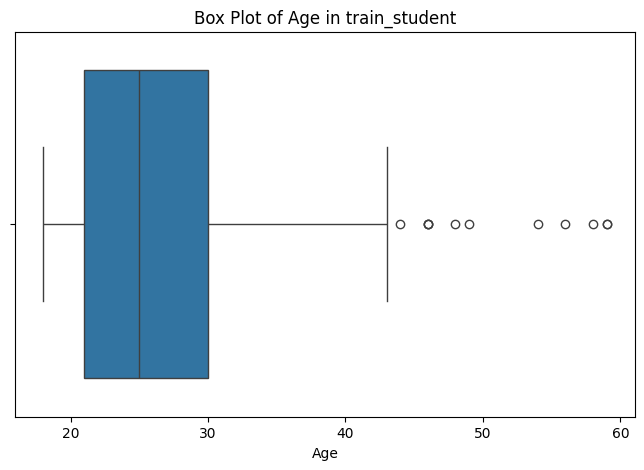

In [65]:
#vẽ box plot cho cột Age trong X_train 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.boxplot(x=X_train_st['Age'])
plt.title('Box Plot of Age in train_student')
plt.xlabel('Age')
plt.show()


### Age Outlier Capping

`Age` là biến số nguyên rời rạc, tuy nhiên công thức IQR ($1.5 \times IQR$) thường trả về kết quả là số thực (ví dụ: biên trên là `43.5`). Để xử lý mâu thuẫn này, chúng em áp dụng phương pháp **Integer-Safe IQR Capping**:

1.  **Tính toán IQR (Train Set Only):**
    * Các tham số thống kê ($Q1, Q3, IQR$) chỉ được tính toán trên tập **Train** để tránh rò rỉ dữ liệu.
2.  **Cơ chế Làm tròn An toàn (Safe Rounding Logic):**
    * Biên dưới (`Lower Bound`) được làm tròn lên (`np.ceil`).
    * Biên trên (`Upper Bound`) được làm tròn xuống (`np.floor`).
    * *Mục đích:* Đảm bảo giới hạn Capping luôn là số nguyên và nằm chặt trong khoảng chấp nhận được (Conservative approach). Ví dụ: Nếu biên trên lý thuyết là `43.5`, chúng em kẹp biên tại `43` thay vì `44` để đảm bảo an toàn tuyệt đối.
3.  **Kẹp biên & Ép kiểu (Clipping & Casting):**
    * Áp dụng giới hạn này cho cả tập Train và Test.
    * Chuyển đổi dữ liệu về dạng số nguyên (`int`) để phù hợp với bản chất sinh học của biến độ tuổi.

In [66]:
import pandas as pd
import numpy as np

def cap_age_iqr_post_split(train_df, test_df, group_name):
    print(f"--- XỬ LÝ OUTLIER AGE BẰNG IQR CAPPING AN TOÀN ({group_name}) ---")
    
    col = 'Age'
    
    # 1. TÍNH TOÁN IQR TRÊN TẬP TRAIN
    age_train = train_df[col].dropna()
    
    Q1 = age_train.quantile(0.25)
    Q3 = age_train.quantile(0.75)
    IQR = Q3 - Q1
    
    # Tính biên gốc
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"  - Q1: {Q1:.2f} | Q3: {Q3:.2f} | IQR: {IQR:.2f}")
    print(f"  - Bound gốc (có thể lẻ): [{lower_bound:.2f}, {upper_bound:.2f}]")
    
    lower_cap = np.ceil(lower_bound)  
    upper_cap = np.floor(upper_bound)  
    
    print(f"  → Bound sau khi làm tròn an toàn: [{lower_cap}, {upper_cap}] (số nguyên)")
    
    # 2. KIỂM TRA SỐ LƯỢNG OUTLIER TRƯỚC KHI CAPPING
    outliers_low = (train_df[col] < lower_bound).sum()
    outliers_high = (train_df[col] > upper_bound).sum()
    print(f"  → Tìm thấy {outliers_low} giá trị thấp quá và {outliers_high} giá trị cao quá trên tập Train.")

    # 3. THỰC HIỆN CAPPING DỨT KHOÁT VỚI GIỚI HẠN ĐÃ LÀM TRÒN
    train_df[col] = train_df[col].clip(lower=lower_cap, upper=upper_cap)
    test_df[col]  = test_df[col].clip(lower=lower_cap, upper=upper_cap)
    
    # Ép về kiểu int (tuổi phải nguyên)
    train_df[col] = train_df[col].astype(int)
    test_df[col]  = test_df[col].astype(int)
    
    print(f"  Age range sau capping: {train_df[col].min()} → {train_df[col].max()}")
    print(f"ĐÃ CAPPING HOÀN HẢO cho nhóm {group_name}!\n")
    
    return train_df, test_df



# 1. Nhóm Sinh viên
X_train_st, X_test_st = cap_age_iqr_post_split(X_train_st, X_test_st, "Student")

# 2. Nhóm Người đi làm
X_train_wk, X_test_wk = cap_age_iqr_post_split(X_train_wk, X_test_wk, "Working Professional")

print("=== THỐNG KÊ AGE SAU KHI CAPPING HOÀN HẢO ===")
print("\nStudent - Train:")
print(X_train_st['Age'].describe())

print("\nWorking Professional - Train:")
print(X_train_wk['Age'].describe())

--- XỬ LÝ OUTLIER AGE BẰNG IQR CAPPING AN TOÀN (Student) ---
  - Q1: 21.00 | Q3: 30.00 | IQR: 9.00
  - Bound gốc (có thể lẻ): [7.50, 43.50]
  → Bound sau khi làm tròn an toàn: [8.0, 43.0] (số nguyên)
  → Tìm thấy 0 giá trị thấp quá và 11 giá trị cao quá trên tập Train.
  Age range sau capping: 18 → 43
ĐÃ CAPPING HOÀN HẢO cho nhóm Student!

--- XỬ LÝ OUTLIER AGE BẰNG IQR CAPPING AN TOÀN (Working Professional) ---
  - Q1: 38.00 | Q3: 53.00 | IQR: 15.00
  - Bound gốc (có thể lẻ): [15.50, 75.50]
  → Bound sau khi làm tròn an toàn: [16.0, 75.0] (số nguyên)
  → Tìm thấy 0 giá trị thấp quá và 0 giá trị cao quá trên tập Train.
  Age range sau capping: 18 → 60
ĐÃ CAPPING HOÀN HẢO cho nhóm Working Professional!

=== THỐNG KÊ AGE SAU KHI CAPPING HOÀN HẢO ===

Student - Train:
count    26488.000000
mean        25.830678
std          4.880308
min         18.000000
25%         21.000000
50%         25.000000
75%         30.000000
max         43.000000
Name: Age, dtype: float64

Working Professional 

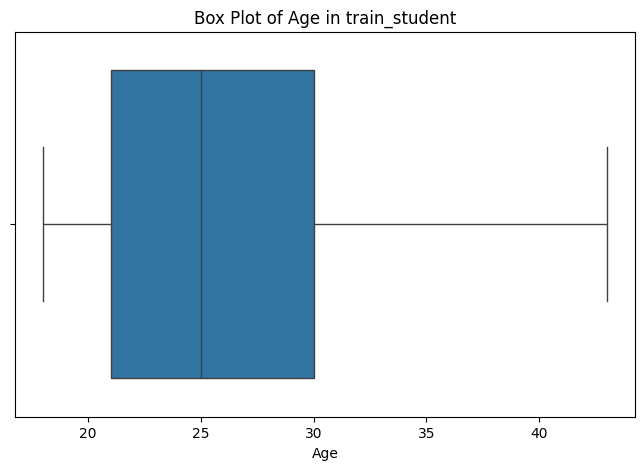

In [67]:
#vẽ box plot cho cột Age trong X_train 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.boxplot(x=X_train_st['Age'])
plt.title('Box Plot of Age in train_student')
plt.xlabel('Age')
plt.show()


# Kiểm tra lại outlier

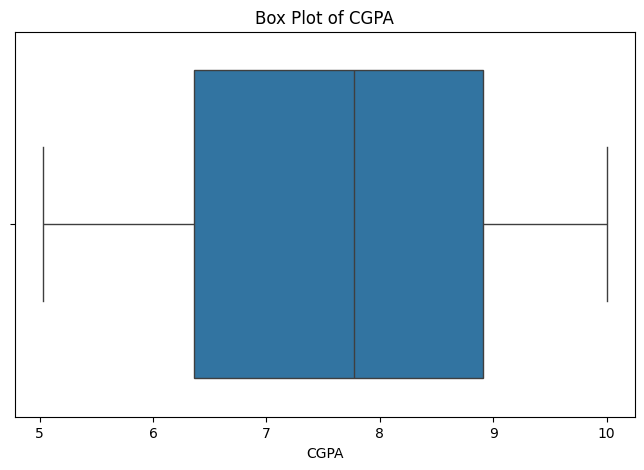

In [68]:
#vẽ box plot cho cột Age trong X_train 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.boxplot(x=X_train_st['CGPA'])
plt.title('Box Plot of CGPA')
plt.xlabel('CGPA')
plt.show()



==================== PHÂN TÍCH OUTLIER: Work/Study Hours (Student) ====================
  - Q1: 4.0 | Q3: 10.0
  - IQR: 6.0
  - Khoảng chấp nhận lý thuyết: [-5.00, 19.00]
  -> Tìm thấy 0 outliers trên tập TRAIN.
  -> Tìm thấy 0 outliers trên tập TEST.


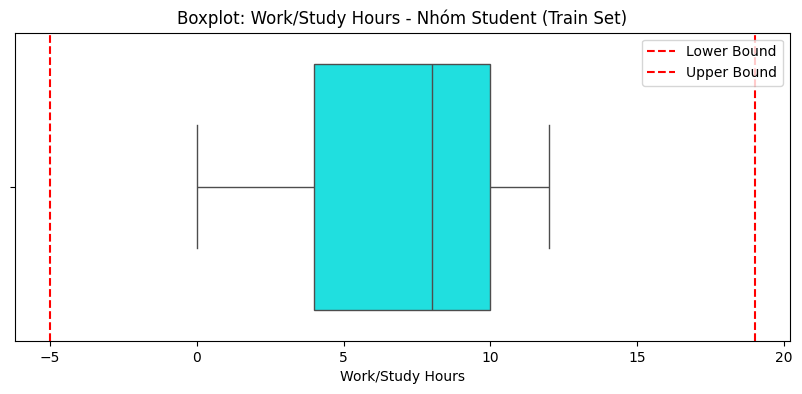


==================== PHÂN TÍCH OUTLIER: Work/Study Hours (Working Professional) ====================
  - Q1: 3.0 | Q3: 9.0
  - IQR: 6.0
  - Khoảng chấp nhận lý thuyết: [-6.00, 18.00]
  -> Tìm thấy 0 outliers trên tập TRAIN.
  -> Tìm thấy 0 outliers trên tập TEST.


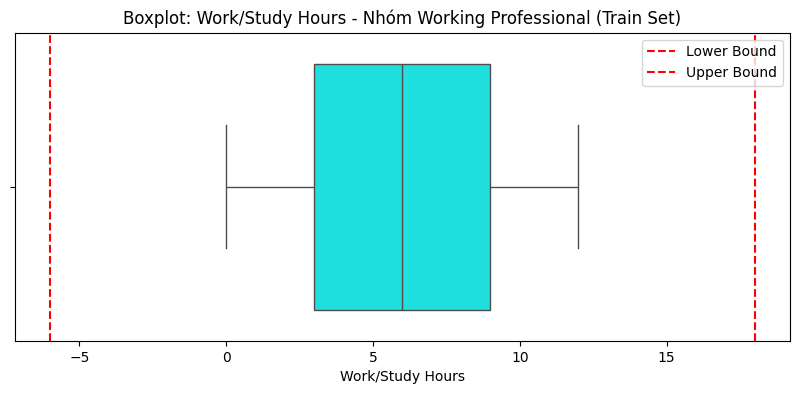

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def detect_outliers_iqr_segment(train_df, test_df, col, group_name):
    print(f"\n{'='*20} PHÂN TÍCH OUTLIER: {col} ({group_name}) {'='*20}")
    
    # 1. Chuẩn bị dữ liệu (Ép kiểu số để tính toán, không làm thay đổi df gốc bên ngoài)
    tr_data = train_df[col].copy()
    te_data = test_df[col].copy()
    
    tr_data = pd.to_numeric(tr_data, errors='coerce')
    te_data = pd.to_numeric(te_data, errors='coerce')

    # 2. TÍNH TOÁN IQR TRÊN TẬP TRAIN
    valid_train = tr_data.dropna()
    

    Q1 = valid_train.quantile(0.25)
    Q3 = valid_train.quantile(0.75)
    IQR = Q3 - Q1
    
    # Tính biên (Thresholds)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"  - Q1: {Q1} | Q3: {Q3}")
    print(f"  - IQR: {IQR}")
    print(f"  - Khoảng chấp nhận lý thuyết: [{lower_bound:.2f}, {upper_bound:.2f}]")
    
    # 3. TÌM KIẾM OUTLIER (DETECTION)
    
    # Trên tập Train
    outliers_tr = tr_data[(tr_data < lower_bound) | (tr_data > upper_bound)]
    print(f"  -> Tìm thấy {len(outliers_tr)} outliers trên tập TRAIN.")
    if len(outliers_tr) > 0:
        print(f"     Ví dụ giá trị: {outliers_tr.head(5).tolist()} ...")

    # Trên tập Test (Dùng ngưỡng của Train để soi)
    outliers_te = te_data[(te_data < lower_bound) | (te_data > upper_bound)]
    print(f"  -> Tìm thấy {len(outliers_te)} outliers trên tập TEST.")

    # 4. VẼ BIỂU ĐỒ BOXPLOT (TRÊN TẬP TRAIN)
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=tr_data, color='cyan')
    plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
    plt.title(f'Boxplot: {col} - Nhóm {group_name} (Train Set)')
    plt.legend()
    plt.show()

    return lower_bound, upper_bound


# 1. Kiểm tra cho Nhóm Sinh viên
lb_st, ub_st = detect_outliers_iqr_segment(X_train_st, X_test_st, 'Work/Study Hours', "Student")

# 2. Kiểm tra cho Nhóm Người đi làm
lb_wk, ub_wk = detect_outliers_iqr_segment(X_train_wk, X_test_wk, 'Work/Study Hours', "Working Professional")

In [70]:
X_train_st.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26488 entries, 58555 to 74920
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     26488 non-null  int64   
 1   Name                                   26488 non-null  object  
 2   Gender                                 26488 non-null  object  
 3   Age                                    26488 non-null  int64   
 4   City                                   26488 non-null  object  
 5   Profession                             26488 non-null  object  
 6   Academic Pressure                      26488 non-null  float64 
 7   Work Pressure                          26488 non-null  int64   
 8   CGPA                                   26488 non-null  float64 
 9   Study Satisfaction                     26488 non-null  float64 
 10  Job Satisfaction                       26488 non-null  int6

In [71]:
# 1. GỘP NHÓM SINH VIÊN (STUDENT)

# Ghép X và y cho tập Train
train_st_full = X_train_st.copy()
train_st_full['Depression'] = y_train_st

# Ghép X và y cho tập Test
test_st_full = X_test_st.copy()
test_st_full['Depression'] = y_test_st

# Gộp chung lại thành bộ Student hoàn chỉnh
df_student_clean = pd.concat([train_st_full, test_st_full], axis=0)
df_student_clean = df_student_clean.reset_index(drop=True)

print(f"-> Kích thước bộ Student sạch: {df_student_clean.shape}")


# 2. GỘP NHÓM NGƯỜI ĐI LÀM (WORKER)


# Ghép X và y cho tập Train
train_wk_full = X_train_wk.copy()
train_wk_full['Depression'] = y_train_wk

# Ghép X và y cho tập Test
test_wk_full = X_test_wk.copy()
test_wk_full['Depression'] = y_test_wk

# Gộp chung lại thành bộ Worker hoàn chỉnh
df_worker_clean = pd.concat([train_wk_full, test_wk_full], axis=0)
df_worker_clean = df_worker_clean.reset_index(drop=True)

print(f"-> Kích thước bộ Worker sạch: {df_worker_clean.shape}")


# Lưu bộ Student
df_student_clean.to_csv("clean_dataset_student_eda.csv", index=False)

# Lưu bộ Worker
df_worker_clean.to_csv("clean_dataset_worker_eda.csv", index=False)


print("Done")

-> Kích thước bộ Student sạch: (33111, 19)
-> Kích thước bộ Worker sạch: (133418, 19)
Done


In [72]:
df_student_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33111 entries, 0 to 33110
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     33111 non-null  int64   
 1   Name                                   33111 non-null  object  
 2   Gender                                 33111 non-null  object  
 3   Age                                    33111 non-null  int64   
 4   City                                   33111 non-null  object  
 5   Profession                             33111 non-null  object  
 6   Academic Pressure                      33111 non-null  float64 
 7   Work Pressure                          33111 non-null  int64   
 8   CGPA                                   33111 non-null  float64 
 9   Study Satisfaction                     33111 non-null  float64 
 10  Job Satisfaction                       33111 non-null  int

In [73]:
import pandas as pd

print("--- ĐANG LƯU CÁC TẬP DỮ LIỆU ĐÃ CHIA NHÓM (SEGMENTED DATA) ---")

# 1. LƯU NHÓM SINH VIÊN (STUDENT)

print("-> Đang lưu bộ Student...")
X_train_st.to_csv("X_train_student.csv", index=False)
X_test_st.to_csv("X_test_student.csv", index=False)
y_train_st.to_csv("y_train_student.csv", index=False)
y_test_st.to_csv("y_test_student.csv", index=False)


# 2. LƯU NHÓM NGƯỜI ĐI LÀM (WORKER)

print("-> Đang lưu bộ Worker...")
X_train_wk.to_csv("X_train_worker.csv", index=False)
X_test_wk.to_csv("X_test_worker.csv", index=False)
y_train_wk.to_csv("y_train_worker.csv", index=False)
y_test_wk.to_csv("y_test_worker.csv", index=False)

print("\n✅ Đã lưu xong 8 file CSV thành công!")


--- ĐANG LƯU CÁC TẬP DỮ LIỆU ĐÃ CHIA NHÓM (SEGMENTED DATA) ---
-> Đang lưu bộ Student...
-> Đang lưu bộ Worker...

✅ Đã lưu xong 8 file CSV thành công!


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f6527928-bbf4-4c9a-8760-1f30ce0e5ba3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>